In [131]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
print ("The libraries have been loaded.")

The libraries have been loaded.


In [102]:
data = pd.read_csv(f'C:\\Users\\Leonardo\\Desktop\\Projetos Python\\Pesquisa\\housing.csv')
data.head()
data = data.dropna()

In [106]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

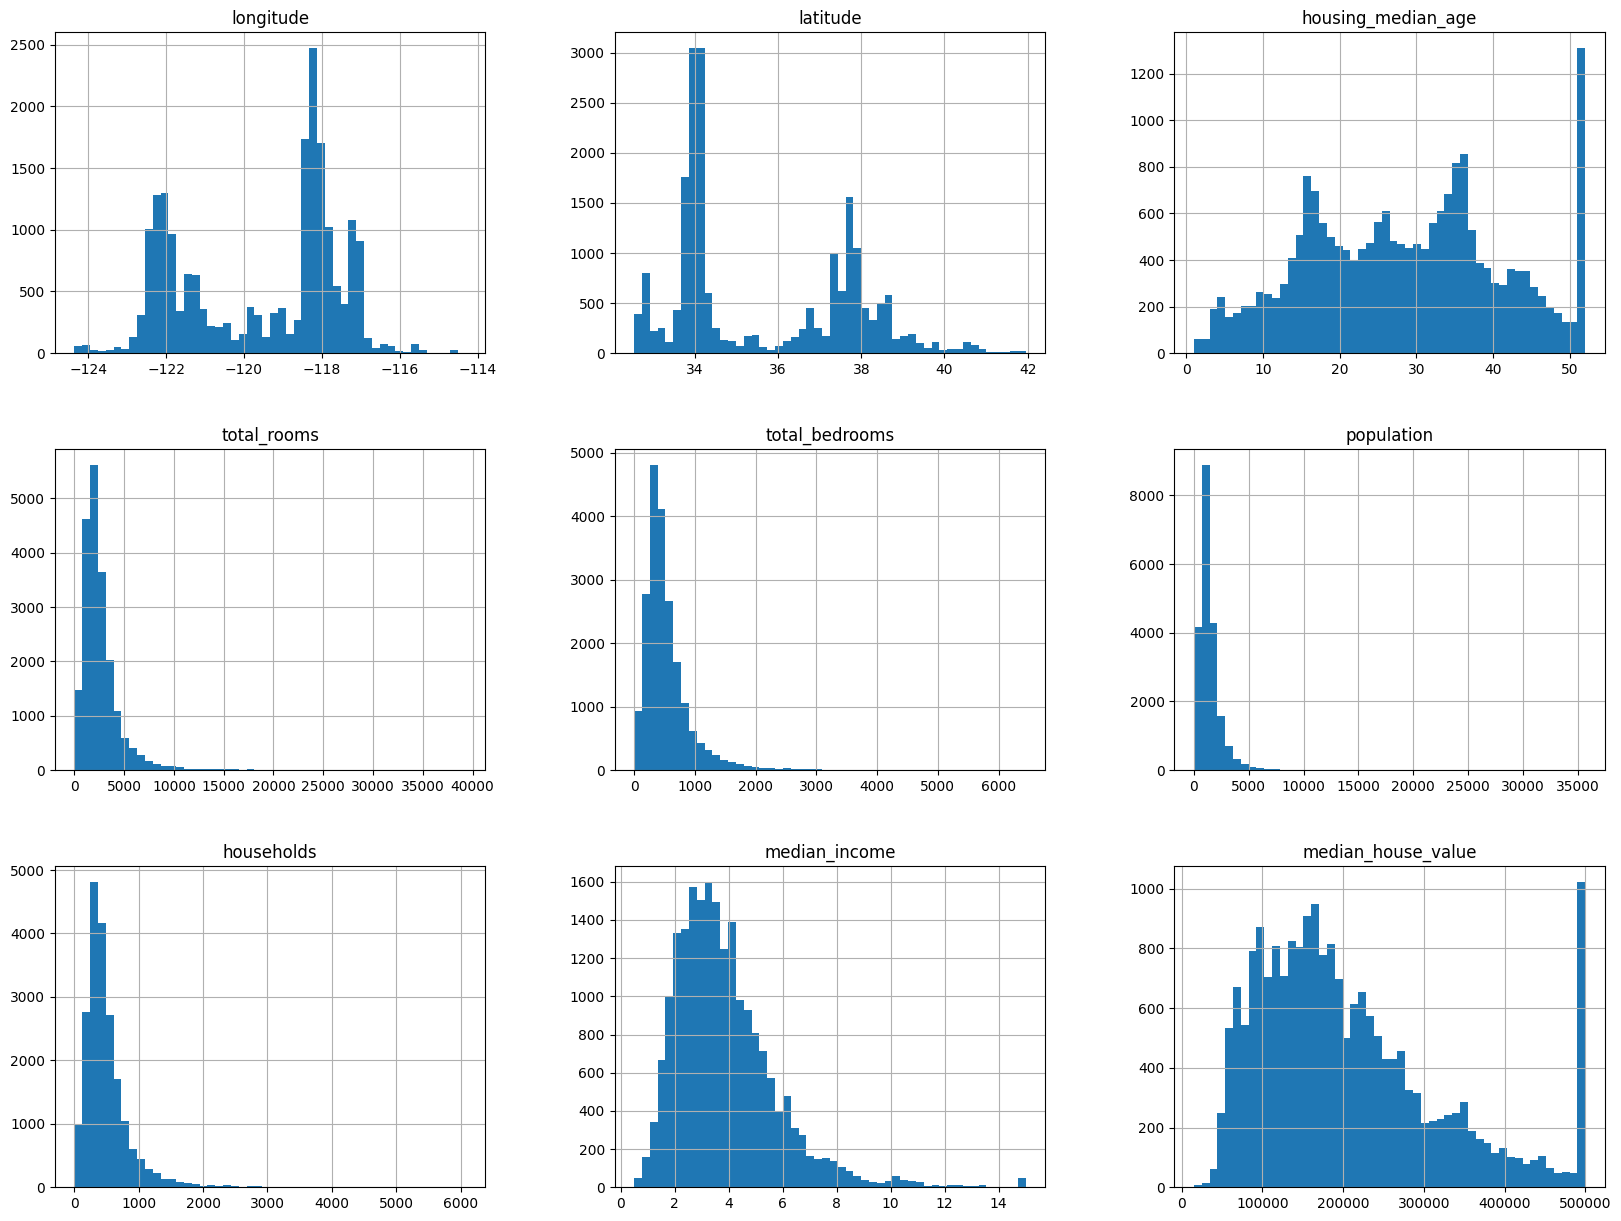

In [107]:
data.hist(bins =50, figsize=(20,15))
plt.show()

In [103]:
x= data.drop(['median_house_value', 'ocean_proximity'], axis = 1)
y = data['median_house_value']

In [104]:
x_train_sm = sm.add_constant(x)
lr= sm.OLS(y,x_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4478.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:52:52   Log-Likelihood:            -2.5682e+05
No. Observations:               20433   AIC:                         5.137e+05
Df Residuals:                   20424   BIC:                         5.137e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.585e+06   6.29

In [116]:
# How strong is the relationship?
# Mean value
print(f'Mean Value: {round(np.sqrt(lr.df_resid), 3)}\n')
# Relative standard error
print(f'RSE is: {round(np.sqrt(lr.mse_resid), 3)}\n')
#Error
print(f'Percentage error: {round(((np.sqrt(lr.mse_resid))/(np.sqrt(lr.df_resid))), 4)*100} % \n')
#R squared
print(f'R squared: {round(lr.rsquared, 3)}\n')


Mean Value: 142.913

RSE is: 69571.472

Percentage error: 48681.15 % 

R squared: 0.637



In [105]:
lr.pvalues

const                  0.000000e+00
longitude              0.000000e+00
latitude               0.000000e+00
housing_median_age    2.946266e-154
total_rooms            3.294848e-25
total_bedrooms         3.188906e-60
population            1.459679e-266
households             2.653505e-10
median_income          0.000000e+00
dtype: float64

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

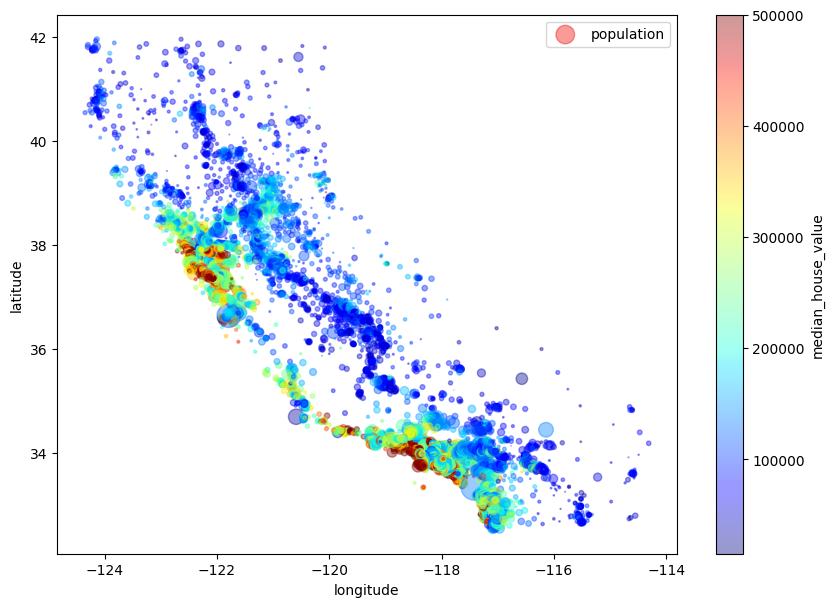

In [118]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=data["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)


In [138]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x, y)
ytree_pred = tree_reg.predict(x)
tree_mse = mean_squared_error(y, ytree_pred)
tree_rse = np.sqrt(tree_mse)
scores = cross_val_score(tree_reg, x, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [124378.8678344   93123.48478354  86051.12009803  75644.64896552
  90561.59560018  87237.51537531  69424.79884365 104204.49777104
 108155.67961716  73956.36820225]
Mean: 91273.857709108
Standard deviation: 16177.717781056812


In [139]:
forest_reg= RandomForestRegressor()
forest_reg.fit(x,y)
yforest_pred = forest_reg.predict(x)
forest_mse = mean_squared_error(y, yforest_pred)
forest_rse = np.sqrt(forest_mse)
scores = cross_val_score(forest_reg, x, y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(forest_rmse_scores)

KeyboardInterrupt: 